# Python Libraries 1

_May 13, 2020_ 

Agenda today:
- Introduction to Numpy: array math
- Introduction to Pandas: importing, indexing, and math

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Part I. Numpy
The basic data structure that exist in numpy is called numpy arrays. NP arrays are very similar to python lists. The __difference__ between a python list and a Numpy array is that list can only a mix of data types but array can only contain the same data type.

But what is the benefits of using NumPy array instead of the base python lists?
- Speed 
- Broadcasting Property

In [2]:
names_list=['Bob','John','Sally']
names_array=np.char.array(['Bob','John','Sally']) #use numpy.array for numbers and numpy.char.array for strings
print(names_list)
print(names_array)

['Bob', 'John', 'Sally']
['Bob' 'John' 'Sally']


In [3]:
import time

size_of_seq = 100000

def pure_python_version():
    tic = time.time()
    X = range(size_of_seq)
    Y = range(size_of_seq)
    Z = [X[i] + Y[i] for i in range(len(X)) ]
    toc = time.time()
    return toc - tic

def numpy_version():
    tic = time.time()
    X = np.arange(size_of_seq)
    Y = np.arange(size_of_seq)
    Z = X + Y 
    toc = time.time()
    return toc - tic


t1 = pure_python_version()
t2 = numpy_version()
print("python: " + str(t1), "numpy: "+ str(t2))
print("Numpy is in this example " + str(t1/t2) + " times faster!")

python: 0.030701875686645508 numpy: 0.0010018348693847656
Numpy is in this example 30.645644930985245 times faster!


In [4]:
## broadcasting and array math

np.array([2,3,4,6]) * 5

array([10, 15, 20, 30])

In [8]:
li = [2,3,4,6]
li * 5

[2, 3, 4, 6, 2, 3, 4, 6, 2, 3, 4, 6, 2, 3, 4, 6, 2, 3, 4, 6]

In [9]:
np.array([22, "annd", 32])

array(['22', 'annd', '32'], dtype='<U21')

### <font color='red'> *np.array will do automatic type coersion!!!!!*</font> ###

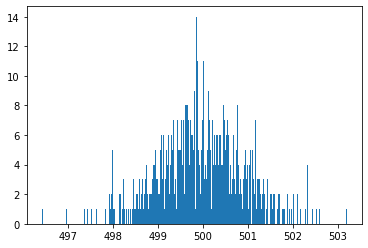

In [36]:
norm = np.random.normal(500, size=1000);
plt.hist(norm, bins = 500);

There are many other wonderous things numpy can do, you will encounter them later in the course of the program. 

## Part II. Pandas
Pandas stand for paneled data, and it is the most popular library for data scientists to manipulate, clean, and organize dataset in Python. The most fundamental data structure that exists in Pandas is called **DataFrames**. 

In [38]:
ls

5-12.md                        notes.md
Pandas_I.ipynb                 practice2.md
Python_Fundamentals.ipynb      practice_file.md
Statistics_Fundamentals.ipynb  readme.md
auto-mpg.csv*


In [51]:
## importing data and look at optional parameters
df = pd.read_csv('auto-mpg.csv')

In [52]:
df.head()# examine and read the data


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [57]:
type(df['weight'])# examine the information in this dataframe


pandas.core.series.Series

In [ ]:
# examine the datatypes of the dataframe


In [ ]:
# talk about series and dataframe 


In [ ]:
# indexing and subsetting 


In [ ]:
# examine whether we have missing value - it could really affect the data!


In [ ]:
# but why do we still have anomaly in our data?


# try converting the datatype!

In [ ]:
# how should we get rid of the anomaly in this case?

In [ ]:
# exercise - get the cars that are heavier than 3000 but has a horsepower less than 150 
